In [59]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections

In [33]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.keys())
print(data['DESCR'])
data['target'] = abs(data['target'] - 1)  #promjena oznaka da pasu clanku

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

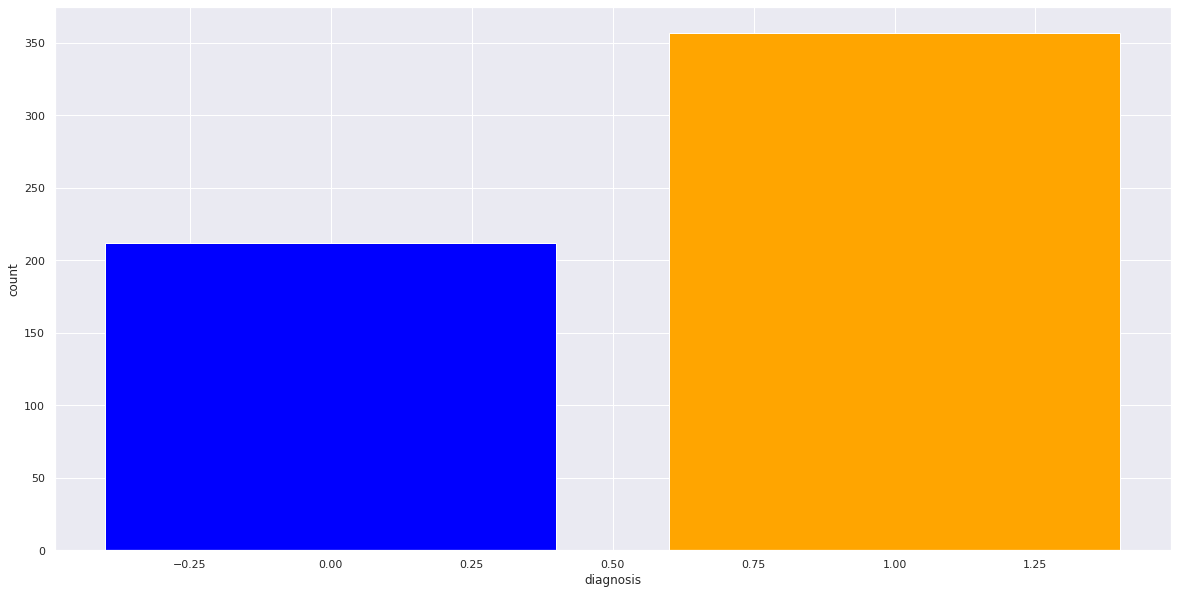

In [62]:
height = [len(list(filter(lambda e: e == 1, data['target'])))]
height.append(len(list(filter(lambda e: e == 0, data['target']))))
plt.bar(np.unique(data['target']), height, color=['blue', 'orange'])
plt.ylabel("count")
plt.xlabel("diagnosis")
plt.show()

In [55]:
pan = pd.DataFrame(data=data['data'], columns=data['feature_names'])
#print(pan[data['feature_names'][:10]])
pan.insert(len(pan.columns), "diagnosis", data['target'])
#print(pan.columns)
mean_cols = pan[np.insert(data['feature_names'][:10], 0, 'diagnosis')]

(31, 31)


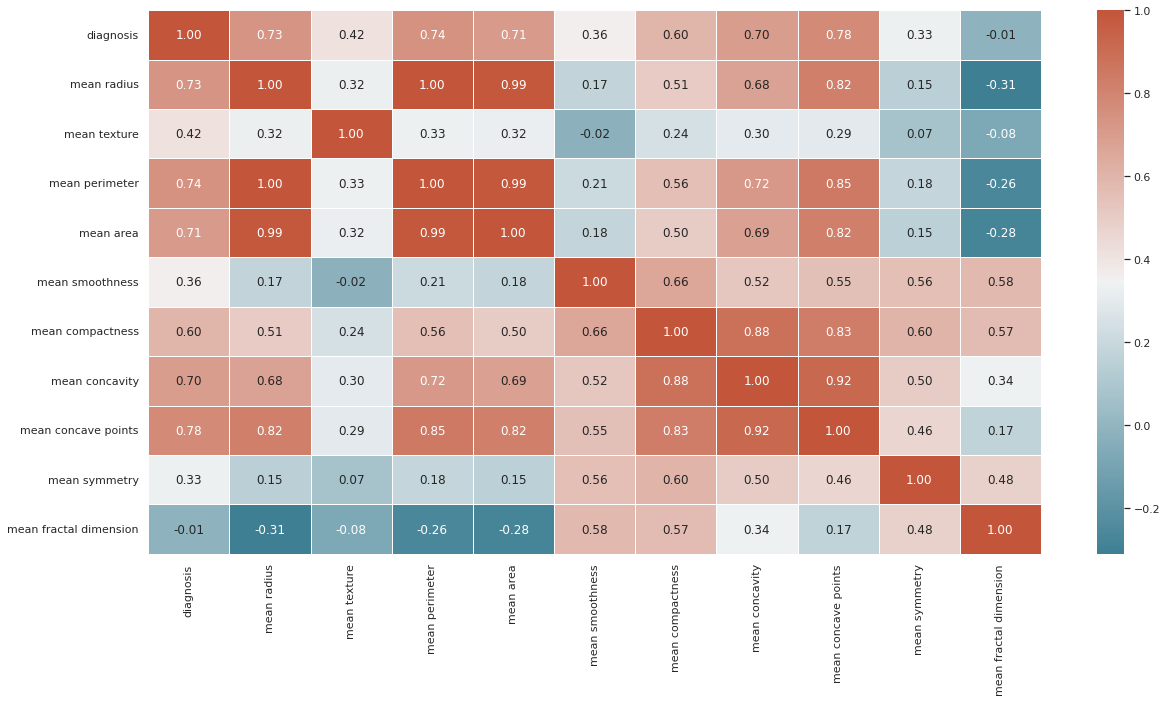

In [56]:
import seaborn as sns
#sns.heatmap(np.corrcoef(data['data']))
#plt.show()
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(mean_cols.corr(), annot=True, fmt=".2f", cmap=sns.diverging_palette(220, 20, as_cmap=True), linewidths=.5)
plt.show()

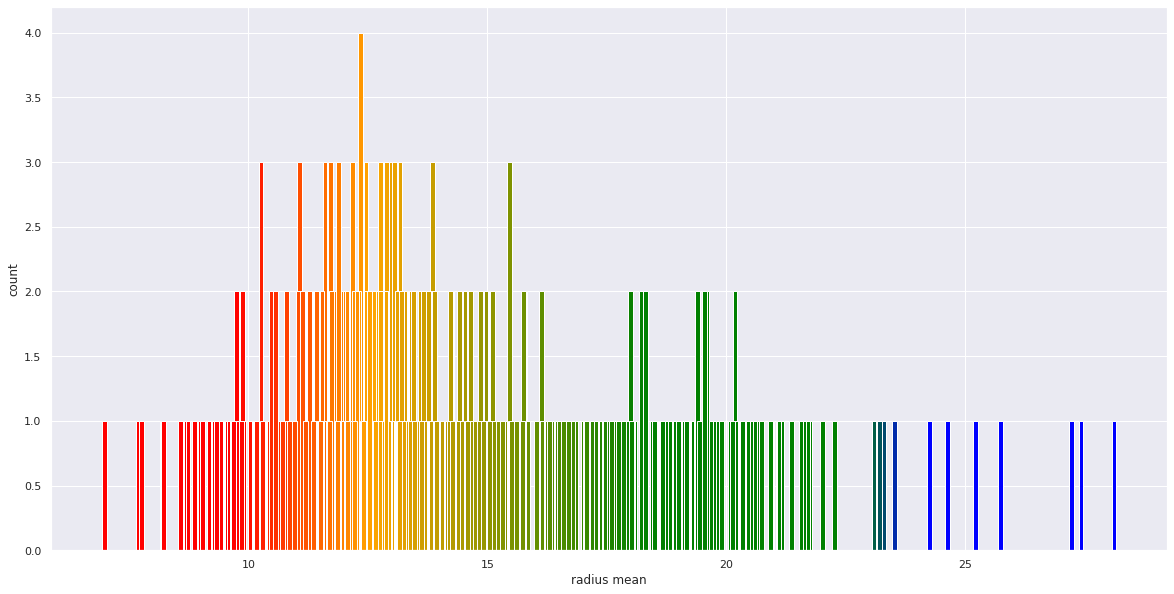

In [100]:
#print(np.unique(pan['mean radius']))
import matplotlib.colors as mcolors
w = collections.Counter(pan['mean radius'])

clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"), 
         (0.7, "green"), (0.75, "blue"), (1, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

x = np.array(list(w.keys())).astype(float)
y = np.array(list(w.values())).astype(float)
plt.bar(x, y, color=rvb(20*x/len(x) - 0.3), width=0.1)
plt.ylabel("count")
plt.xlabel("radius mean")
plt.show()

In [112]:
corr_feature_target = pan[data['feature_names'][:]].corrwith(pan['diagnosis'])
#type(corr_feature_target)
corr_feature_target.array

<PandasArray>
[   0.7300285113754555,   0.41518529984520364,    0.7426355297258321,
    0.7089838365853891,    0.3585599650859316,    0.5965336775082525,
    0.6963597071719048,    0.7766138400204349,    0.3304985542625465,
 -0.012837602698432355,    0.5671338208247166, -0.008303332973877434,
    0.5561407034314825,    0.5482359402780236,  -0.06701601057948728,
   0.29299924424885804,    0.2537297659808302,   0.40804233271650414,
 -0.006521755870647952,   0.07797241739025602,    0.7764537785950386,
   0.45690282139679755,    0.7829141371737585,    0.7338250349210504,
   0.42146486106640196,    0.5909982378417913,    0.6596102103692325,
    0.7935660171412687,   0.41629431104861886,    0.3238721887208235]
Length: 30, dtype: float64

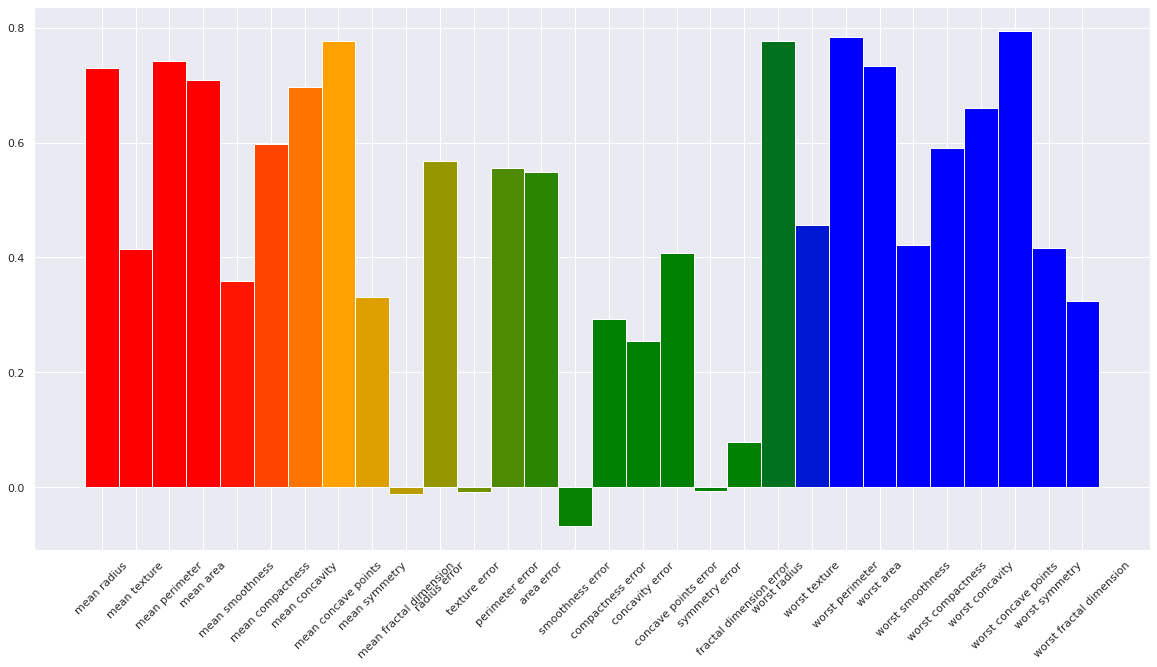

In [123]:
x = corr_feature_target.index.array
y = corr_feature_target.array
plt.bar(x, y, color=rvb(np.arange(len(x)) * 9), width=1)
plt.xticks(rotation=45)
plt.show()

In [127]:
to_drop = []
tol = 0.2
for l, corr in zip(x, y):
    if abs(corr) < tol:
        to_drop.append(l)
print(to_drop)
pan.drop(columns=to_drop)
print(pan.columns)

['mean fractal dimension', 'texture error', 'smoothness error', 'symmetry error', 'fractal dimension error']
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')


## Data split

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = pd.DataFrame(data=data['data'], columns=data['feature_names'])
Y = pd.DataFrame(data=data['target'], columns=['diagnosis'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

acc = {}

## Logistic regression

In [154]:
from sklearn.linear_model import LogisticRegression
model = "LR"
acc[model] = {}
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred_train = clf.predict(X_train)
acc[model]['train'] = accuracy_score(y_train, pred_train)
pred_test = clf.predict(X_test)
acc[model]['test'] = accuracy_score(y_test, pred_test)

/home/fran/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/fran/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [155]:
print(acc)

{'LR': {'train': 0.9460093896713615, 'test': 0.9440559440559441}, 'SVM': {'train': 0.9248826291079812, 'test': 0.9090909090909091}}


## SVM

In [152]:
from sklearn.svm import SVC
model = "SVM"
acc[model] = {}
clf = SVC()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
acc[model]['train'] = accuracy_score(y_train, pred_train)
pred_test = clf.predict(X_test)
acc[model]['test'] = accuracy_score(y_test, pred_test)

/home/fran/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
print(acc)

{'LR': {'train': 0.9460093896713615, 'test': 0.9440559440559441}, 'SVM': {'train': 0.9248826291079812, 'test': 0.9090909090909091}}


## RF

In [156]:
from sklearn.ensemble import RandomForestClassifier
model = "RF"
acc[model] = {}
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
acc[model]['train'] = accuracy_score(y_train, pred_train)
pred_test = clf.predict(X_test)
acc[model]['test'] = accuracy_score(y_test, pred_test)

/tmp/ipykernel_3414/2019516858.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


In [157]:
print(acc)

{'LR': {'train': 0.9460093896713615, 'test': 0.9440559440559441}, 'SVM': {'train': 0.9248826291079812, 'test': 0.9090909090909091}, 'RF': {'train': 1.0, 'test': 0.972027972027972}}


## Naive Bayes

In [158]:
from sklearn.naive_bayes import GaussianNB
model = "NB"
acc[model] = {}

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_train = gnb.predict(X_train)
acc[model]['train'] = accuracy_score(y_train, pred_train)
pred_test = gnb.predict(X_test)
acc[model]['test'] = accuracy_score(y_test, pred_test)

/home/fran/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [159]:
print(acc)

{'LR': {'train': 0.9460093896713615, 'test': 0.9440559440559441}, 'SVM': {'train': 0.9248826291079812, 'test': 0.9090909090909091}, 'RF': {'train': 1.0, 'test': 0.972027972027972}, 'NB': {'train': 0.9389671361502347, 'test': 0.965034965034965}}


## Decision Tree

In [160]:
from sklearn.tree import DecisionTreeClassifier

model = "DT"
acc[model] = {}
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
acc[model]['train'] = accuracy_score(y_train, pred_train)
pred_test = clf.predict(X_test)
acc[model]['test'] = accuracy_score(y_test, pred_test)

In [161]:
print(acc)

{'LR': {'train': 0.9460093896713615, 'test': 0.9440559440559441}, 'SVM': {'train': 0.9248826291079812, 'test': 0.9090909090909091}, 'RF': {'train': 1.0, 'test': 0.972027972027972}, 'NB': {'train': 0.9389671361502347, 'test': 0.965034965034965}, 'DT': {'train': 1.0, 'test': 0.9230769230769231}}


## KNN

In [162]:
from sklearn.neighbors import KNeighborsClassifier

model = "KNN"
acc[model] = {}
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
acc[model]['train'] = accuracy_score(y_train, pred_train)
pred_test = clf.predict(X_test)
acc[model]['test'] = accuracy_score(y_test, pred_test)

/home/fran/miniconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [163]:
print(acc)

{'LR': {'train': 0.9460093896713615, 'test': 0.9440559440559441}, 'SVM': {'train': 0.9248826291079812, 'test': 0.9090909090909091}, 'RF': {'train': 1.0, 'test': 0.972027972027972}, 'NB': {'train': 0.9389671361502347, 'test': 0.965034965034965}, 'DT': {'train': 1.0, 'test': 0.9230769230769231}, 'KNN': {'train': 0.9577464788732394, 'test': 0.9230769230769231}}


## Tablica

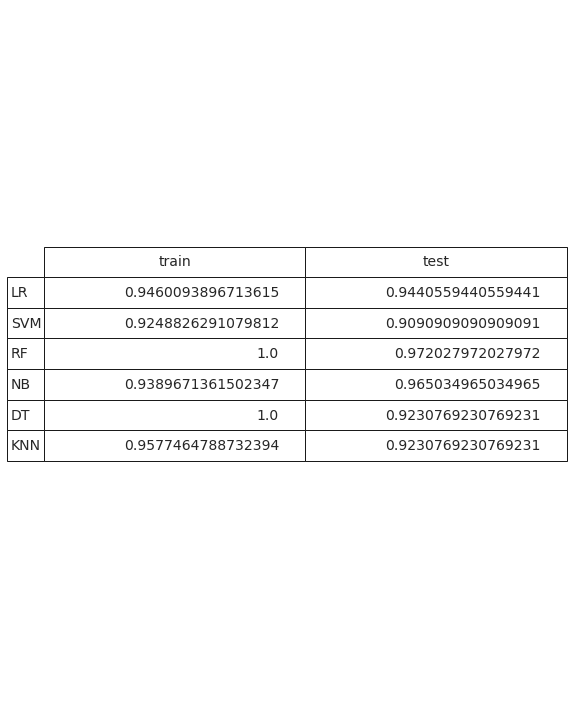

In [170]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

vals = []
for accs in acc.values():
    vals.append([accs['train'], accs['test']])
    
table = ax.table(cellText=vals, colLabels=['train', 'test'], rowLabels=list(acc.keys()), loc='center')
table.set_fontsize(14)
table.scale(2, 2)  # may help
fig.tight_layout()

plt.show()